In [1]:
import pandas as pd
import numpy as np
from benchmarks import MinVarianceMethod, MaxSharpeMethod
from environment import Environment
from utils import get_stats, cumulative_pct_change
from price_predictors import ArimaModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Environments

In [2]:
env = Environment()
minvar_method = MinVarianceMethod(allow_short=True)
maxsharpe_method = MaxSharpeMethod(allow_short=True)
arima_model = ArimaModel(allow_short=True)

# Testing and getting results

In [ ]:
WINDOW_FIT = 180
WINDOW_HOLD = 180
N_ASSETS = len(env.returns.columns)
weights_equal, weights_minvar, weights_maxsharpe, weights_arima = [], [], [], []
result_equal, result_minvar, result_maxsharpe, result_arima = [], [], [], []


for i in range(0, len(env.returns), WINDOW_FIT):
    print(f"Testing Window from {i} to {i+WINDOW_FIT} and Training window from {i+WINDOW_FIT} to {i+WINDOW_FIT+WINDOW_HOLD}")

    if (i + WINDOW_FIT  > len(env.returns)) :
        print("Exceeded training and hold window, will stop")
        break

    testing_period_returns = env.get_state(
        start=i, 
        length=WINDOW_FIT
        )
    
    holding_period_returns = env.get_state(
        start = i + WINDOW_FIT, 
        length = WINDOW_HOLD
    )


    ################## BENCHMARK MODELS

    ### 1. Equal weights
    equal_weights = np.ones(N_ASSETS) / N_ASSETS

    r = np.dot(holding_period_returns, equal_weights)
    result_equal.append(r.tolist())
    weights_equal.append(equal_weights)

    ### 2. Min variance
    min_var_weights = minvar_method.get_optimal_weights(testing_period_returns)
    print(f"Min var weights: {min_var_weights}")

    r = np.dot(holding_period_returns, min_var_weights)
    result_minvar.append(r.tolist())
    weights_minvar.append(min_var_weights)

    ### 3. Max Sharpe
    max_sharpe_weights = maxsharpe_method.get_optimal_weights(testing_period_returns)
    print(f"Max sharpe weights: {max_sharpe_weights}")

    r = np.dot(holding_period_returns, max_sharpe_weights)
    result_maxsharpe.append(r.tolist())
    weights_maxsharpe.append(max_sharpe_weights)


    
    ################## Price Predictors put here: aka LSTM and RL
    prices = env.get_prices(
        start=i, 
        length=WINDOW_FIT
        )

    # ARIMA MODEL:
    arima_weights = arima_model.get_optimal_weights(prices, WINDOW_HOLD)
    print(f"Arima Weights: {arima_weights}")

    r = np.dot(holding_period_returns, arima_weights)
    result_arima.append(r.tolist())
    weights_arima.append(arima_weights)

Testing Window from 0 to 180 and Training window from 180 to 360
Min var weights: [-0.1116139   0.12577256  0.177784    0.02615013 -0.26462025  0.1617855
  0.13394545  0.38074621 -0.00570264  0.35582864  0.00197428  0.03455764
 -0.01660762]
Max sharpe weights: [-0.9999999   0.1472438  -0.52892596  0.47299422  0.34030774 -0.98985258
 -0.19289703  0.80246869  0.99999787  0.99999928 -0.09193438  0.07115299
 -0.03055474]
Arima Weights: [-0.09587428  0.69030748 -0.31027552  0.08875181 -0.2028255   0.36217775
  0.02178783  0.18223896 -0.34545694  0.68769544  0.17469094 -0.10132693
 -0.15189103]
Testing Window from 180 to 360 and Training window from 360 to 540
Min var weights: [ 0.15280347  0.02979232  0.17400162 -0.14560542 -0.1554491   0.20112382
 -0.00108431  0.43683418  0.06692211  0.17699087 -0.03008018  0.08081123
  0.01293939]
Max sharpe weights: [ 0.06319554 -0.35426943  0.08188817 -0.03023855  0.16109413  0.37811349
  0.48936984  0.52906551  0.03343428  0.07401107 -0.25748919  0.015

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Arima Weights: [ 0.1924439  -0.13913356  0.14405776  0.06607993  0.08446805  0.14386075
 -0.09044254  0.0877393  -0.06959507  0.13290637  0.47059573 -0.66870882
  0.64572819]
Testing Window from 360 to 540 and Training window from 540 to 720
Min var weights: [-0.00158606  0.0334003  -0.05362712  0.1885672  -0.2620895   0.26871889
 -0.01906098  0.44645083  0.10171261  0.28023028  0.0053005   0.02527275
 -0.01328971]
Max sharpe weights: [-0.91945409 -0.93011481  0.69720368  0.61312855  0.99998687 -0.0892112
 -0.08589932  0.93804386  0.149775   -0.41201729 -0.05895233  0.22327593
 -0.12576486]


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Arima Weights: [ 0.20055961 -0.20276902  0.03640331  0.1736254  -0.19141436 -0.01802552
  0.0908064  -0.12778234 -0.05840035  0.23287085  0.19027842  0.35277567
  0.32107192]
Testing Window from 540 to 720 and Training window from 720 to 900
Min var weights: [ 0.23508281 -0.03660154 -0.33728276 -0.23739957 -0.87291602  0.99999944
 -0.08991863 -0.34141243  0.64667906  0.99998755 -0.09036909  0.04270253
  0.08144867]
Max sharpe weights: [ 0.99999933 -0.98961995 -0.65312795  0.999996    0.02273226 -0.05976855
 -0.99998455 -0.3574281   0.92671874  0.99999751  0.18898859  0.39695229
 -0.47545562]


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Arima Weights: [ 0.05014189  0.06733553  0.1480458   0.10723577  0.02746112  0.13095748
  0.14785964  0.20453271  0.12241763  0.03119434  0.02713842 -0.20370469
  0.13938437]
Testing Window from 720 to 900 and Training window from 900 to 1080
Min var weights: [-1.05803119e-01  2.80144765e-03  6.44102997e-02  9.75661883e-03
 -7.26946598e-02  5.36767337e-01  9.06686192e-02 -7.31288818e-02
  4.34683048e-01  1.12535230e-01  4.17269976e-04  2.07159555e-03
 -2.48480486e-03]
Max sharpe weights: [-0.63140021  0.02170258  0.71091288 -0.13211207 -0.00500771  0.05246096
  0.81101099 -0.65408121  0.90245898 -0.16583036  0.08414972  0.00433748
  0.00139799]


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Arima Weights: [-0.04015048 -0.12239056 -0.13772387 -0.00277969 -0.10318988  0.19251332
 -0.02487186  0.42771538 -0.04096611  0.24656647 -0.31664392  0.11868473
  0.80323647]
Testing Window from 900 to 1080 and Training window from 1080 to 1260
Min var weights: [-0.09633902  0.12782896 -0.10640195  0.1547575  -0.08668398  0.44295497
 -0.0728426   0.19170377  0.29578383  0.13611875 -0.02289187  0.04428288
 -0.00827124]
Max sharpe weights: [ 0.28310982  0.63072294 -0.28189636 -0.99999917  0.10447272  0.68237658
 -0.06523439  0.39306081  0.08094922  0.13985893 -0.06747863  0.06946943
  0.03058809]


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Arima Weights: [ 5.40245147e-01 -3.57938158e-01  2.99203204e-04  1.40006735e-01
 -1.24964680e-01  1.87805338e-01  4.55716272e-01 -1.77266377e-02
  4.91704988e-01  3.61287434e-02  3.83920204e-01 -3.91085266e-01
 -3.44111889e-01]
Testing Window from 1080 to 1260 and Training window from 1260 to 1440
Min var weights: [ 0.00865271  0.0797491   0.03194875  0.10128105 -0.34623125  0.61290285
 -0.15034422  0.04999848  0.61230909  0.0119594  -0.01279501 -0.03204019
  0.03260926]
Max sharpe weights: [-0.6814946   0.34611511  0.75773072  0.99999957 -0.01684991  0.44604481
 -0.99999859  0.12629466  0.99999906 -0.73240359 -0.01482116 -0.39591235
  0.16529627]


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Arima Weights: [ 0.0566472   0.18902002 -0.1192596   0.1341519   0.06443153  0.07673771
  0.1413169   0.23509825 -0.02589532  0.18320841 -0.08234939  0.20878645
 -0.06189407]
Testing Window from 1260 to 1440 and Training window from 1440 to 1620
Min var weights: [-0.10813985  0.08696593  0.02079564  0.05279858  0.13306565  0.55534555
 -0.09376917  0.03172672  0.32528036 -0.01781666 -0.0060988   0.02108913
 -0.00124308]
Max sharpe weights: [-0.62328474  0.85715848 -0.99999281  0.4846689   0.99999928  0.26044691
 -0.99998886  0.33575988 -0.43584078  0.95942111 -0.52604378  0.51359342
  0.174103  ]
Arima Weights: [ 0.18979635  0.24729597  0.23129614  0.23182622 -0.48086758  0.25304869
  0.06469261  0.15765319  0.26253624 -0.35015845 -0.23224468  0.2539799
  0.17114538]
Testing Window from 1440 to 1620 and Training window from 1620 to 1800
Min var weights: [ 0.11227468  0.09003255  0.08611346  0.0623513   0.17803368  0.35192536
 -0.14405323  0.00479893  0.36516706 -0.12375415 -0.03232869  

# Evaluation

In [21]:
test = [0, -50, 50, ]
assert cumulative_pct_change(test).tolist() == [0,-50.0,-25.0]

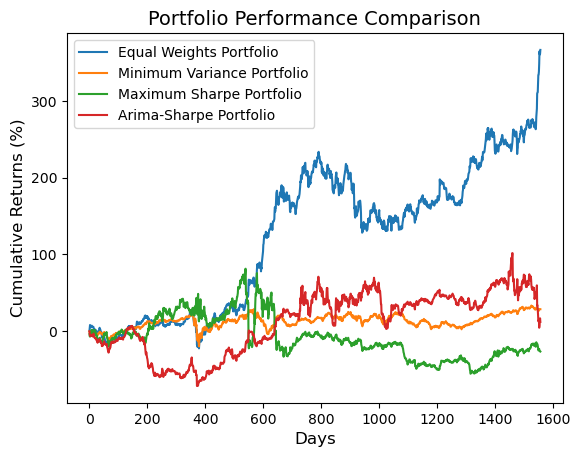

In [22]:
# flatten into list and compare results
equal_weights_daily_returns = [item for sublist in result_equal for item in sublist]
minvar_method_daily_returns = [item for sublist in result_minvar for item in sublist]
maxsharpe_method_daily_returns = [item for sublist in result_maxsharpe for item in sublist]
arima_method_daily_returns = [item for sublist in result_arima for item in sublist]

plt.figure()
plt.xlabel("Days", fontsize=12)
plt.ylabel("Returns (%)")
plt.plot(cumulative_pct_change(equal_weights_daily_returns), label = "Equal Weights Portfolio")
plt.plot(cumulative_pct_change(minvar_method_daily_returns), label = "Minimum Variance Portfolio")
plt.plot(cumulative_pct_change(maxsharpe_method_daily_returns), label = "Maximum Sharpe Portfolio")
plt.plot(cumulative_pct_change(arima_method_daily_returns), label = "Arima-Sharpe Portfolio")
plt.ylabel("Cumulative Returns (%)", fontsize=12)
plt.title("Portfolio Performance Comparison", fontsize=14)
plt.legend(fontsize=10)
plt.show()


In [23]:
results = []


equal_weights_stats = get_stats(equal_weights_daily_returns)
equal_weights_stats["Name"] = "Equal Weights Portfolio"
results.append(equal_weights_stats)

minvar_method_stats = get_stats(minvar_method_daily_returns)
minvar_method_stats["Name"] = "Minimum Variance Portfolio"
results.append(minvar_method_stats)

maxsharpe_method_stats = get_stats(maxsharpe_method_daily_returns)
maxsharpe_method_stats["Name"] = "Maximum Sharpe Portfolio"
results.append(maxsharpe_method_stats)

arima_method_stats = get_stats(arima_method_daily_returns)
arima_method_stats["Name"] = "Arima-Sharpe Portfolio"
results.append(arima_method_stats)


stats = pd.DataFrame(results).set_index("Name")
stats

,Cumulative Return,Sharpe Ratio,Maximum Drawdown,Value at Risk
Name,,,,
Equal Weights Portfolio,366.632272,0.067744,3.148736,2.341344
Minimum Variance Portfolio,28.554549,0.019784,6.874335,1.667883
Maximum Sharpe Portfolio,-26.631038,0.008753,11.457291,3.890203
Arima-Sharpe Portfolio,11.982757,0.017112,13.700919,4.016250
